In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

In [4]:
digits=load_digits()
cl=pd.DataFrame(digits.data)
cl['Target']=digits.target
print(cl.head())

     0    1    2     3     4     5    6    7    8    9  ...   55   56   57  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  0.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    58    59    60    61   62   63  Target  
0  6.0  13.0  10.0   0.0  0.0  0.0       0  
1  0.0  11.0  16.0  10.0  0.0  0.0       1  
2  0.0   3.0  11.0  16.0  9.0  0.0       2  
3  7.0  13.0  13.0   9.0  0.0  0.0       3  
4  0.0   2.0  16.0   4.0  0.0  0.0       4  

[5 rows x 65 columns]


In [6]:
kmeans=KMeans(n_clusters=10,random_state=42)
kmeans.fit(digits.data)

KMeans(n_clusters=10, random_state=42)

In [7]:
cl['cluster']=kmeans.labels_
print(cl.head())

     0    1    2     3     4     5    6    7    8    9  ...   56   57   58  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  6.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  0.0  0.0  7.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

     59    60    61   62   63  Target  cluster  
0  13.0  10.0   0.0  0.0  0.0       0        5  
1  11.0  16.0  10.0  0.0  0.0       1        7  
2   3.0  11.0  16.0  9.0  0.0       2        7  
3  13.0  13.0   9.0  0.0  0.0       3        6  
4   2.0  16.0   4.0  0.0  0.0       4        4  

[5 rows x 66 columns]


In [8]:
pca=PCA(n_components=2)
pca_result=pca.fit_transform(digits.data)

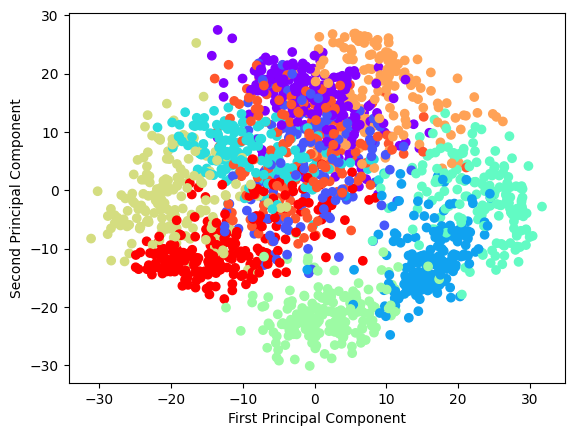

In [9]:
plt.scatter(pca_result[:,0],pca_result[:,1],c=cl['cluster'],cmap='rainbow')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [12]:
cluster_ceners=kmeans.cluster_centers_.reshape(10,8,8)
print(cluster_ceners)

[[[ 0.00000000e+00  9.84455959e-02  4.60103627e+00  1.27979275e+01
    1.42227979e+01  1.13108808e+01  5.13989637e+00  9.63730570e-01]
  [-2.68882139e-17  9.06735751e-01  1.03989637e+01  1.15129534e+01
    1.03730570e+01  1.26839378e+01  5.71502591e+00  5.69948187e-01]
  [-1.34441069e-17  9.79274611e-01  5.27461140e+00  2.23316062e+00
    6.37823834e+00  1.16062176e+01  3.54404145e+00  1.19170984e-01]
  [-3.03576608e-18  9.32642487e-01  4.86528497e+00  6.25906736e+00
    1.20414508e+01  1.24507772e+01  4.89119171e+00  5.18134715e-03]
  [ 0.00000000e+00  1.39378238e+00  8.62176166e+00  1.29067358e+01
    1.48134715e+01  1.10362694e+01  4.04663212e+00  0.00000000e+00]
  [-2.42861287e-17  9.68911917e-01  4.78756477e+00  1.11502591e+01
    1.13989637e+01  3.76683938e+00  5.49222798e-01 -3.46944695e-18]
  [-2.60208521e-17  4.14507772e-02  2.36787565e+00  1.23471503e+01
    6.67875648e+00  3.83419689e-01  1.03626943e-02 -5.55111512e-16]
  [-1.51788304e-18  6.73575130e-02  5.73575130e+00  1.2

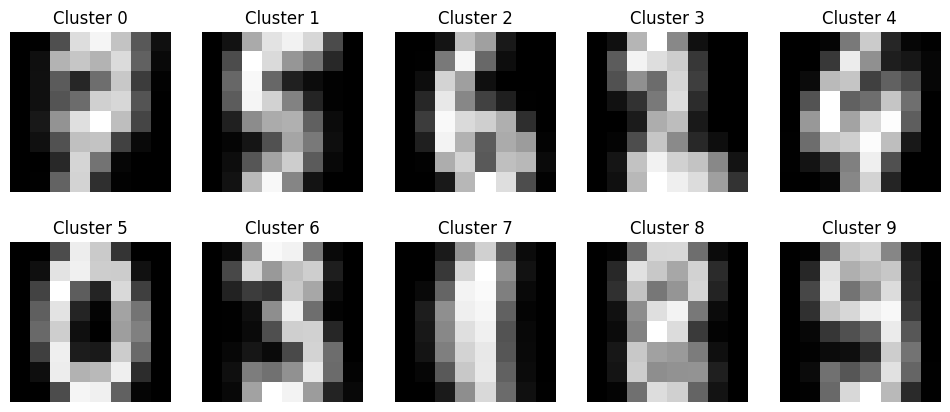

In [14]:
fig,axes=plt.subplots(2,5,figsize=(12,5))
for i,ax in enumerate(axes.flat):
    ax.imshow(cluster_ceners[i],cmap='gray')
    ax.set_title(f'Cluster {i}')
    ax.axis('off')
plt.show()